# Variable Notes

pclass: 
A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import random as rnd


In [3]:
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
import os
os.listdir('.')

['test.csv',
 'titanic_prediction-1.ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv']

In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
combine = [train_df,test_df]

In [16]:
# describe the dataset
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### categorical data : `'Survived' 'Sex' 'Embarked'` ; `Pclass`
### numerical data :  `Age, Fare, SibSp, Parch`

In [18]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
# info of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Cabin has high number of null elements
#### there are 283 People with siblings and spouses and rest 608 are without

In [23]:
train_df['SibSp'].astype(bool).sum()

283

#### 76% :  213 people without parents/children

In [29]:
train_df['Parch'].astype(bool).sum()

213

In [38]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [65]:
pclassGrouped = train_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()

In [66]:
pclassGrouped

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


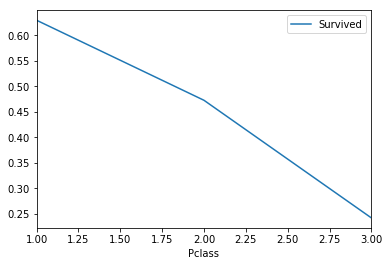

In [67]:
pclassGrouped.plot(y='Survived',x = 'Pclass')

In [68]:
sexGrouped = train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

In [69]:
sexGrouped

,Survived
Sex,
female,0.742038
male,0.188908


In [74]:
sexGrouped.plot?

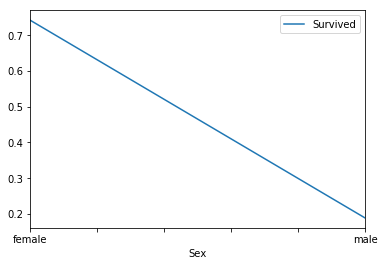

In [73]:
sexGrouped.plot(y='Survived')

In [82]:
sibSpGrouped = train_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [83]:
sibSpGrouped

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


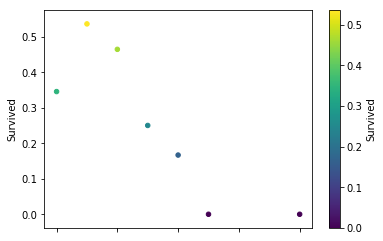

In [87]:
sibSpGrouped.plot.scatter(y='Survived',x='SibSp',c='Survived',colormap='viridis')

In [97]:
parchGrouped = train_df[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

In [98]:
parchGrouped

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


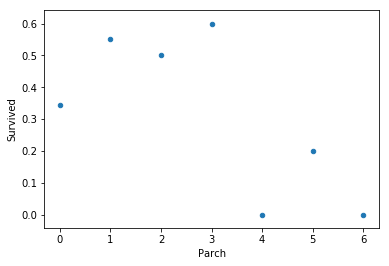

In [99]:
parchGrouped.plot.scatter(x='Parch',y='Survived')

# More visualisation

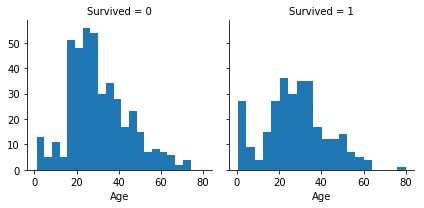

In [100]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

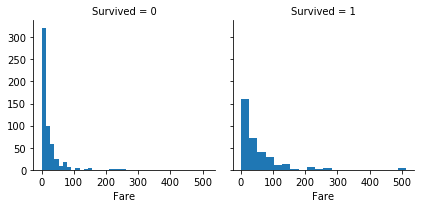

In [104]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Fare',bins=20)

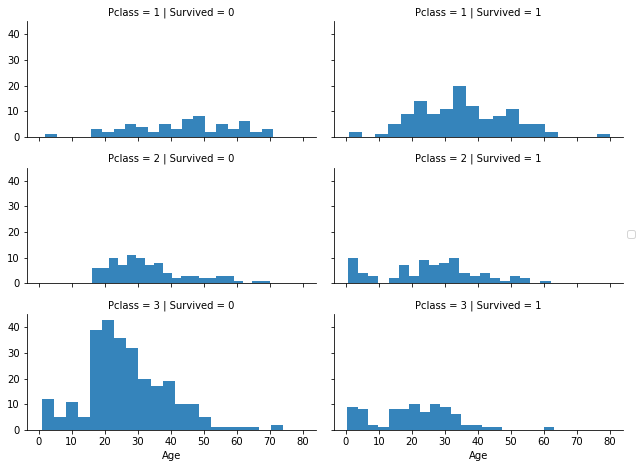

In [107]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.9, bins=20)
grid.add_legend();